# **TASK 1**

In [231]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
# Reading the dataset .csv file and visualizing it

df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [233]:
# Descriptive statistics

df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [234]:
# Checking the null values present in dataset (if any)

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [235]:
df['Drug'].dtype

dtype('O')

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


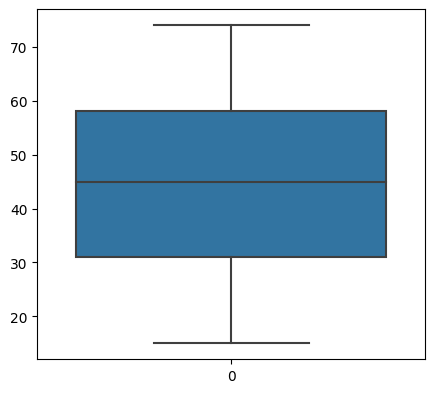

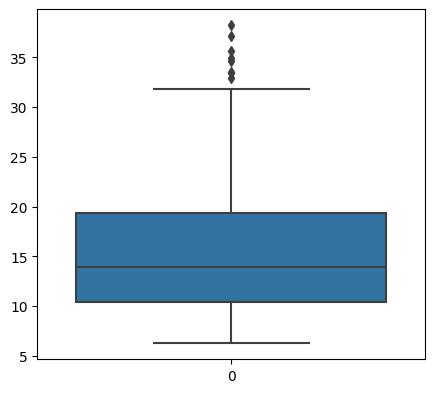

In [237]:
#Checking for outliers in the Age and Na_to_K columns of the dataset.

items=['Age','Na_to_K']
for i,j in enumerate(items):
  plt.figure(figsize=(5,10))
  plt.subplot(2,1,i+1)
  sns.boxplot(df[j])

<Axes: >

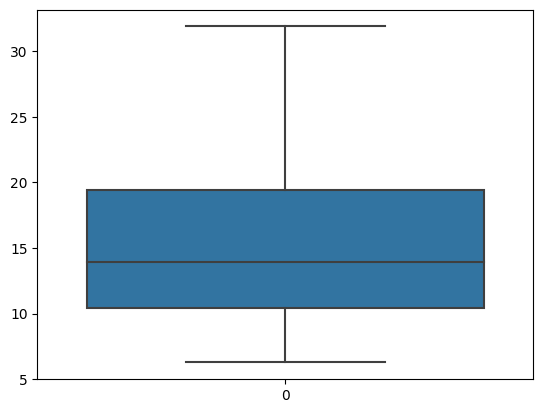

In [238]:
# Since the Na_to_K column contained some outliers, we worked upon that

q1=df.Na_to_K.quantile(.25)
q3=df.Na_to_K.quantile(.75)
IQR = q3-q1
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,30,df['Na_to_K'])
sns.boxplot(df.Na_to_K)

In [239]:
#Splitting the dataset 

x = df.iloc[:,0:5]
y = df.iloc[:,5:]
print(x)
print(y)

     Age Sex      BP Cholesterol  Na_to_K
0     23   F    HIGH        HIGH   25.355
1     47   M     LOW        HIGH   13.093
2     47   M     LOW        HIGH   10.114
3     28   F  NORMAL        HIGH    7.798
4     61   F     LOW        HIGH   18.043
..   ...  ..     ...         ...      ...
195   56   F     LOW        HIGH   11.567
196   16   M     LOW        HIGH   12.006
197   52   M  NORMAL        HIGH    9.894
198   23   M  NORMAL      NORMAL   14.020
199   40   F     LOW      NORMAL   11.349

[200 rows x 5 columns]
      Drug
0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
..     ...
195  drugC
196  drugC
197  drugX
198  drugX
199  drugX

[200 rows x 1 columns]


In [240]:
# Finding the unique categories of various columns in the dataset 

print(df['Sex'].unique())
print(df['BP'].unique())
print(df['Cholesterol'].unique())
print(df['Drug'].unique())


['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [241]:
# Performing encoding on the dataset to convert categorical variables to indicator variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x['Sex']=le.fit_transform(x['Sex'])
x['BP']=le.fit_transform(x['BP'])
x['Cholesterol']=le.fit_transform(x['Cholesterol'])
print(x)


     Age  Sex  BP  Cholesterol  Na_to_K
0     23    0   0            0   25.355
1     47    1   1            0   13.093
2     47    1   1            0   10.114
3     28    0   2            0    7.798
4     61    0   1            0   18.043
..   ...  ...  ..          ...      ...
195   56    0   1            0   11.567
196   16    1   1            0   12.006
197   52    1   2            0    9.894
198   23    1   2            1   14.020
199   40    0   1            1   11.349

[200 rows x 5 columns]


In [242]:
y = pd.get_dummies(df.iloc[:,5:]).values
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1,

In [243]:
#Splitting the data into train and test 

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=20)

In [244]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((160, 5), (40, 5), (160, 5), (40, 5))

# **TASK 2**

In [245]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Building the model
model = Sequential()

# Add the input layer
model.add(Dense(8,input_dim=5,activation='relu'))

# 3 hidden layer
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

# Output layer
model.add(Dense(5,activation='softmax'))

# Model compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


# m

In [246]:
# Model Summary
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 8)                 48        
                                                                 
 dense_112 (Dense)           (None, 64)                576       
                                                                 
 dense_113 (Dense)           (None, 128)               8320      
                                                                 
 dense_114 (Dense)           (None, 64)                8256      
                                                                 
 dense_115 (Dense)           (None, 5)                 325       
                                                                 
Total params: 17,525
Trainable params: 17,525
Non-trainable params: 0
_________________________________________________________________


In [247]:
# Training the model
model.fit(xtrain,ytrain,epochs=22,batch_size=5,validation_data=(xtest,ytest))

Epoch 1/22
32/32 [==============================] - 1s 9ms/step - loss: 1.3351 - accuracy: 0.5250 - val_loss: 1.2752 - val_accuracy: 0.4750
Epoch 2/22
32/32 [==============================] - 0s 3ms/step - loss: 1.1280 - accuracy: 0.5688 - val_loss: 1.3920 - val_accuracy: 0.4750
Epoch 3/22
32/32 [==============================] - 0s 3ms/step - loss: 1.0626 - accuracy: 0.5500 - val_loss: 1.1777 - val_accuracy: 0.4750
Epoch 4/22
32/32 [==============================] - 0s 4ms/step - loss: 1.0519 - accuracy: 0.5500 - val_loss: 1.3639 - val_accuracy: 0.4750
Epoch 5/22
32/32 [==============================] - 0s 4ms/step - loss: 1.0232 - accuracy: 0.6000 - val_loss: 1.3096 - val_accuracy: 0.5000
Epoch 6/22
32/32 [==============================] - 0s 4ms/step - loss: 0.9947 - accuracy: 0.5875 - val_loss: 1.2786 - val_accuracy: 0.3750
Epoch 7/22
32/32 [==============================] - 0s 4ms/step - loss: 0.9662 - accuracy: 0.5938 - val_loss: 1.2295 - val_accuracy: 0.4000
Epoch 8/22
32/32 [==

# **TASK 3**

In [248]:
# Testing the model
# We input the following values: 
# 1) Age: 46
# 2) Sex: Male
# 3) BP: Normal
# 4) Cholesterol: Normal
# 5) Na_to_K ratio: 7.285

# Expected Prediction: Drug X
# Outcome: Our Model predicted DrugX with an accuracy of about 93%.

model.predict([[46,1,2,1,7.285]])

1/1 [==============================] - 0s 99ms/step


array([[0.00727298, 0.00594711, 0.02742479, 0.02755585, 0.9317992 ]],
      dtype=float32)